# Copied from:
#### This script is for training an SVM in order to classify between *dry* and *wet* coughs
Author: Matthias Bittner

e-mail: matthias.bittner1@gmx.at

Features are read from a  csv and then used for training

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

##### Loading extracted features from audiofiles

In [2]:
df = pd.read_csv('./trimmed_cough_data/features.csv')
mid_feature_names = df.columns.values[0:-1]
data = df.to_numpy()
features = data[:, 0:-1]
labels = data[:, -1]
print(mid_feature_names)
#print(labels)

['zcr_mean' 'energy_mean' 'energy_entropy_mean' 'spectral_centroid_mean'
 'spectral_spread_mean' 'spectral_entropy_mean' 'spectral_flux_mean'
 'spectral_rolloff_mean' 'mfcc_1_mean' 'mfcc_2_mean' 'mfcc_3_mean'
 'mfcc_4_mean' 'mfcc_5_mean' 'mfcc_6_mean' 'mfcc_7_mean' 'mfcc_8_mean'
 'mfcc_9_mean' 'mfcc_10_mean' 'mfcc_11_mean' 'mfcc_12_mean' 'mfcc_13_mean'
 'chroma_1_mean' 'chroma_2_mean' 'chroma_3_mean' 'chroma_4_mean'
 'chroma_5_mean' 'chroma_6_mean' 'chroma_7_mean' 'chroma_8_mean'
 'chroma_9_mean' 'chroma_10_mean' 'chroma_11_mean' 'chroma_12_mean'
 'chroma_std_mean' 'delta zcr_mean' 'delta energy_mean'
 'delta energy_entropy_mean' 'delta spectral_centroid_mean'
 'delta spectral_spread_mean' 'delta spectral_entropy_mean'
 'delta spectral_flux_mean' 'delta spectral_rolloff_mean'
 'delta mfcc_1_mean' 'delta mfcc_2_mean' 'delta mfcc_3_mean'
 'delta mfcc_4_mean' 'delta mfcc_5_mean' 'delta mfcc_6_mean'
 'delta mfcc_7_mean' 'delta mfcc_8_mean' 'delta mfcc_9_mean'
 'delta mfcc_10_mean' 'delta m

#### Preprocessing Data - Normalization

In [3]:
data_scaled = preprocessing.StandardScaler().fit_transform(features)

##### Analyzing Feature Space

With the 'ind' list one can have a look the different features and how good they seem to be seperated.
In this case the two features energy and delta_energy have been choosen. It seems to be that sneezing produces a constant energy level, while coughing does not.

     energy_mean  delta energy_std align
0      -0.507243         -0.522109   dry
1      -0.160468         -0.154856   dry
2      -0.180217         -0.358150   dry
3      -0.256876         -0.448379   dry
4      -0.419366         -0.559971   dry
..           ...               ...   ...
121    -0.574914         -0.665241   wet
122    -0.463175         -0.385522   wet
123    -0.566541         -0.588452   wet
124    -0.626411         -0.930458   wet
125    -0.365035         -0.574900   wet

[126 rows x 3 columns]


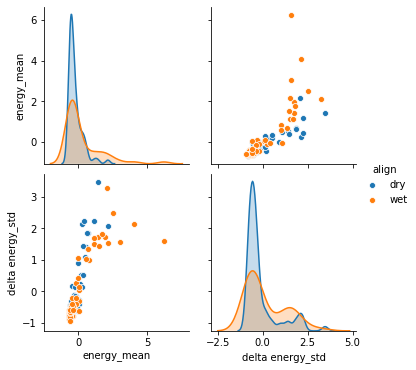

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
#ind = [1,68]
#ind = [1,35]
ind = [1,103]
#ind = [69,103]
feature_names = mid_feature_names[ind]
Cough_df_red = pd.DataFrame(data_scaled[:,ind], columns = feature_names )
Cough_df_red["align"] = pd.Series(labels).apply(lambda x: "wet" if x==1 else "dry")
print(Cough_df_red)
g = sns.pairplot(Cough_df_red, hue="align")
plt.show()




### PCA to check how much redundant information is stored in the features.


Explained variability
[ 16.78097041  25.22870077  32.05229924  37.82327995  42.66763788
  46.69875528  49.88042256  52.96396762  55.55945299  57.98783344
  60.28718486  62.50894414  64.53251166  66.42364715  68.20877295
  69.87574364  71.41759658  72.88308129  74.27513226  75.62618272
  76.87413019  78.09585547  79.23746465  80.27585478  81.29324281
  82.26606692  83.20477736  84.07738905  84.93078226  85.74623389
  86.53008827  87.22568658  87.90455244  88.55969562  89.20122446
  89.79822203  90.35418292  90.88745939  91.38352297  91.83129492
  92.25432429  92.66906252  93.06139911  93.45084186  93.80812511
  94.1618775   94.49762087  94.82415465  95.12155784  95.41522083
  95.69254688  95.94978193  96.20385325  96.44380392  96.66834706
  96.87940123  97.07828247  97.2690927   97.45339192  97.60534844
  97.75615244  97.89663916  98.02969096  98.16048517  98.2829221
  98.39784309  98.5052179   98.60489269  98.69894479  98.78680269
  98.87217403  98.94977018  99.02302008  99.09436973  9

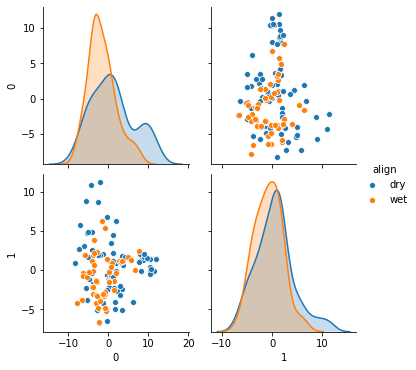

In [6]:
from sklearn import decomposition
#PCA decomposition to eliminate the irrelevant features
print("Explained variability")
pca = decomposition.PCA(whiten=False).fit(data_scaled) 
print(100*pca.explained_variance_ratio_.cumsum())

data_reduced = decomposition.PCA(n_components=2,whiten=False).fit_transform(data_scaled) 

dry_df_pca = pd.DataFrame(data_reduced)
dry_df_pca["align"] = pd.Series(labels).apply(lambda x: "wet" if x==1 else "dry")
print(dry_df_pca)
g = sns.pairplot(dry_df_pca, hue="align")
plt.show()


#### Splitting into Test Data and Train Data

All the data_scaled  is used to train the SVM -> PCA just use to visualize

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_scaled, labels, test_size=0.30, random_state=50, shuffle=True)

SVM Training with Grid Search
==========


In [8]:
def evaluation_SVM(tuned_parameters,X_train, y_train, X_test, y_test):
    scores = ['f1']
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(
            SVC(), tuned_parameters, scoring='%s_macro' % score,cv=3, n_jobs=-1
        )
        clf.fit(X_train, y_train)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print()
        print(clf.score(X_test,y_test))
    return clf.best_params_

#### Libraries for SVM


In [9]:
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn import decomposition
from sklearn.model_selection import ShuffleSplit


#### Radial bases function kernel/Gaussian kernel


In [10]:
from sklearn.model_selection import GridSearchCV
tuned_parameters_2 = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 25, 50, 75, 100, 200, 500, 750, 1000, 2000, 5000, 7000], 'kernel': ['rbf'], 'decision_function_shape': ['ovr'], 'gamma': [3, 2, 1, 1e-1, 1e-3, 1e-4, 1e-5],},]
rbfKernel_param=evaluation_SVM(tuned_parameters_2,X_train, y_train, X_test, y_test)

# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'C': 50, 'decision_function_shape': 'ovr', 'gamma': 0.0001, 'kernel': 'rbf'}

Grid scores on development set:

0.362 (+/-0.002) for {'C': 0.001, 'decision_function_shape': 'ovr', 'gamma': 3, 'kernel': 'rbf'}
0.362 (+/-0.002) for {'C': 0.001, 'decision_function_shape': 'ovr', 'gamma': 2, 'kernel': 'rbf'}
0.362 (+/-0.002) for {'C': 0.001, 'decision_function_shape': 'ovr', 'gamma': 1, 'kernel': 'rbf'}
0.362 (+/-0.002) for {'C': 0.001, 'decision_function_shape': 'ovr', 'gamma': 0.1, 'kernel': 'rbf'}
0.362 (+/-0.002) for {'C': 0.001, 'decision_function_shape': 'ovr', 'gamma': 0.001, 'kernel': 'rbf'}
0.362 (+/-0.002) for {'C': 0.001, 'decision_function_shape': 'ovr', 'gamma': 0.0001, 'kernel': 'rbf'}
0.362 (+/-0.002) for {'C': 0.001, 'decision_function_shape': 'ovr', 'gamma': 1e-05, 'kernel': 'rbf'}
0.362 (+/-0.002) for {'C': 0.01, 'decision_function_shape': 'ovr', 'gamma': 3, 'kernel': 'rbf'}
0.362 (+/-0.002) 

/home/andrine/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


###### Polynomial Kernel

In [11]:
tuned_parameters_3 = [ {'C': [0.01, 0.1, 1, 10, 25, 100], 'kernel': ['poly'], 'decision_function_shape': ['ovr'], 'degree': [1,2,3],'gamma': [5, 4, 3, 2, 1, 1e-1] },]
polyKernel_param=evaluation_SVM(tuned_parameters_3,X_train, y_train, X_test, y_test)

# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'C': 0.01, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 1, 'kernel': 'poly'}

Grid scores on development set:

0.583 (+/-0.050) for {'C': 0.01, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 5, 'kernel': 'poly'}
0.572 (+/-0.161) for {'C': 0.01, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 4, 'kernel': 'poly'}
0.536 (+/-0.195) for {'C': 0.01, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 3, 'kernel': 'poly'}
0.499 (+/-0.179) for {'C': 0.01, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 2, 'kernel': 'poly'}
0.586 (+/-0.111) for {'C': 0.01, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
0.362 (+/-0.002) for {'C': 0.01, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}
0.530 (+/-0.198) for {'C': 0.01, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 5, 'kernel': 'poly'}
0.530 (+/-0.198) for {'C

/home/andrine/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


##### Using the best polynomial kernel

In [12]:
rbfKernel_param = {'C': 0.01, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 1, 'kernel': 'poly'}
best_gaussian_model = SVC(**rbfKernel_param)
best_gaussian_model.fit(X_train, y_train)


SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

##### Storing classifier

In [13]:
import joblib
joblib.dump(best_gaussian_model, 'wet_dry_classifier.joblib')

['wet_dry_classifier.joblib']

In [14]:
from joblib import dump, load

dry_classifier = load('wet_dry_classifier.joblib')
#prediction = cough_classifier.predict(features)  # coughs=0 , no_cough = 1
result = dry_classifier.score(data_scaled, labels)
print(result)

0.8809523809523809


[[-1.10970786 -0.07338572 -0.15404643 ...  0.32493751 -0.40671435
   0.47632032]
 [ 0.05645245 -0.44531446  0.02247832 ...  1.05617365 -0.02566576
   0.63966343]
 [-0.92171018 -0.47249996  0.61561071 ... -0.95597238 -0.22249436
  -0.95614517]
 ...
 [ 0.19142631 -0.43379442  0.30333896 ... -0.69696255  1.29340153
  -0.92307332]
 [-0.80865551  0.70850818 -0.32631908 ...  0.83034569 -0.54121925
   0.45207825]
 [ 0.1504119  -0.52399394 -0.11706156 ...  0.30240873 -0.25701388
   0.11507386]]
